# Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
## Attributes

### People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

#### Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

### Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

#### Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

## Target
Need to perform clustering to summarize customer segments.


In [2]:
# Import necessary modules

import numpy as np # to perform calculations
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns

In [3]:
# Import dataset
dataset = pd.read_csv("Customer-Personality-Analysis.csv", sep='\t')

In [4]:
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [44]:
# Describe the contents of the dataset
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [45]:
# Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Shape of the data
dataset.shape # It has 2240 rows and 29 columns

(2240, 29)

In [6]:
# Get the columns
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
#Checking if null values are present
dataset.isna()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Get sum of any null values present
dataset.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

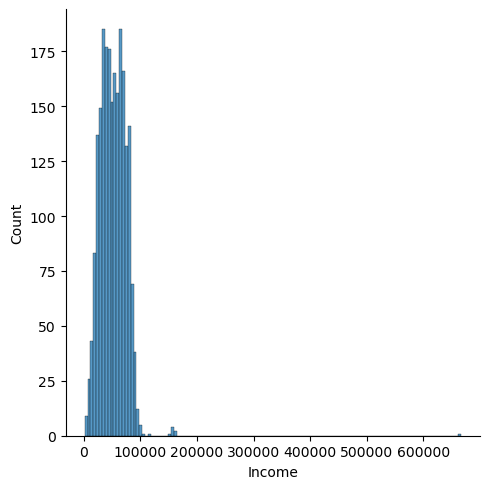

In [9]:
#There are 24 missing values in the 'Income' column, check for distibution using seaborn
sns.displot(dataset['Income'])
plt.show()

#### From the above distribution plot, we can tell that most people have low to medium income, therefore the data is left-skewed (negative skewness). We will replace the null values with MEDIAN

In [10]:
#Filling null values in the 'Income' column with the MEDIAN
dataset['Income'] = dataset['Income'].fillna(dataset['Income'].median())

In [11]:
#Check for any duplicate values that could be present in the dataset
dataset[dataset.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [12]:
# Extra step, let's take a look at the number of unique values present in each column
dataset.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [13]:
# Drop unnecessary columns in the dataset
# Z_CostContact and Z_Revenue have the same values in all rows
dataset = dataset.drop(columns=["Z_CostContact", "Z_Revenue"], axis=1)
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [14]:
#Check the columns present after dropping some
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

## To find out what we can do with the remaining columns, perform UNIVARIATE ANALYSIS.
### Univariate Analysis explores each variable/column in a dataset separately.
### It looks for a range & central tendency of values.
### It then describes the pattern of response to the variable, describing each on its own.

#### 1. Analysis on the 'Year_Birth' variable

In [15]:
print("Unique categories in the Year_Birth column are: ", dataset['Year_Birth'].value_counts())

Unique categories in the Year_Birth column are:  1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


#### Univariate analysis code to plot graph for specified column

In [16]:
def univariate(col):
    plt.figure(figsize=(20,8))
    
    # Check if the column is numerical or categorical
    if dataset[col].dtype == 'object' or dataset[col].nunique() < 20:  # For categorical-like data
        sns.countplot(x=dataset[col], palette="viridis")
    else:  # For numerical data like 'Year_Birth'
        sns.histplot(dataset[col], discrete=True, kde=False, color='blue')

    # Ensure all unique values in the x-axis are shown
    if dataset[col].dtype != 'object':  # For numerical columns
        years = sorted(dataset[col].unique())
        plt.xticks(years, rotation=90, fontsize=10)  # Adjust font size for better readability
    
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Univariate Analysis of {col}')
    plt.tight_layout()  # To ensure labels are not cut off
    plt.show()


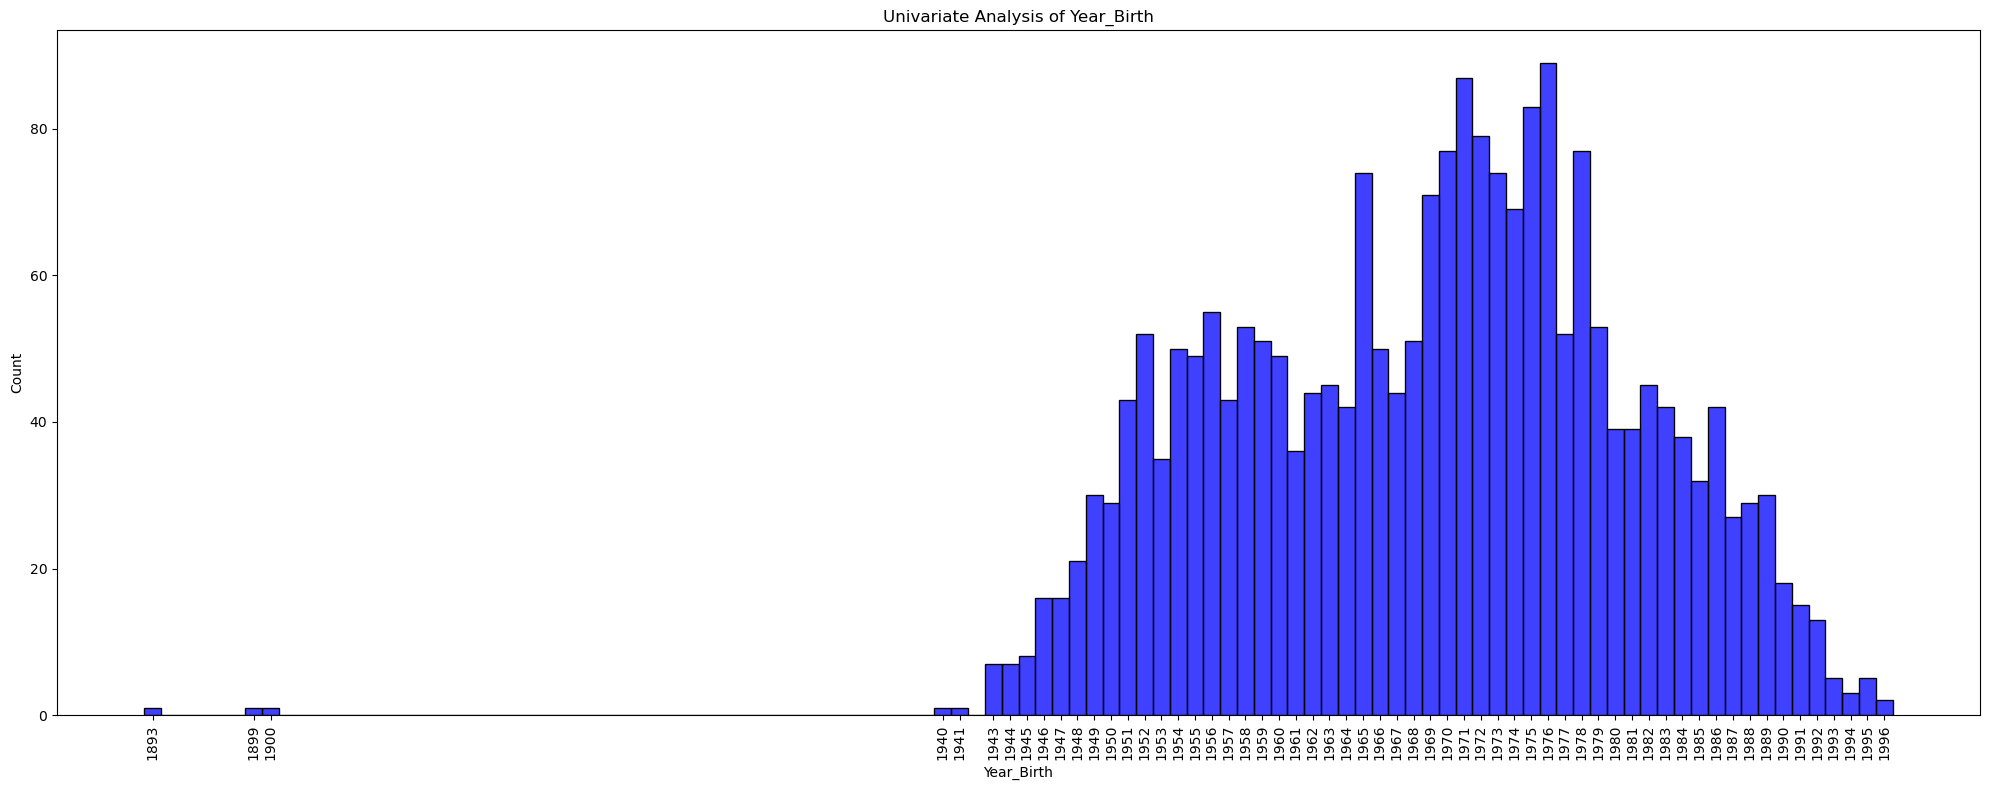

In [17]:
univariate('Year_Birth')

#### 2. Analysis on the 'Education' variable

In [18]:
print("Unique categories in the Education column are: ", dataset['Education'].unique())

Unique categories in the Education column are:  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


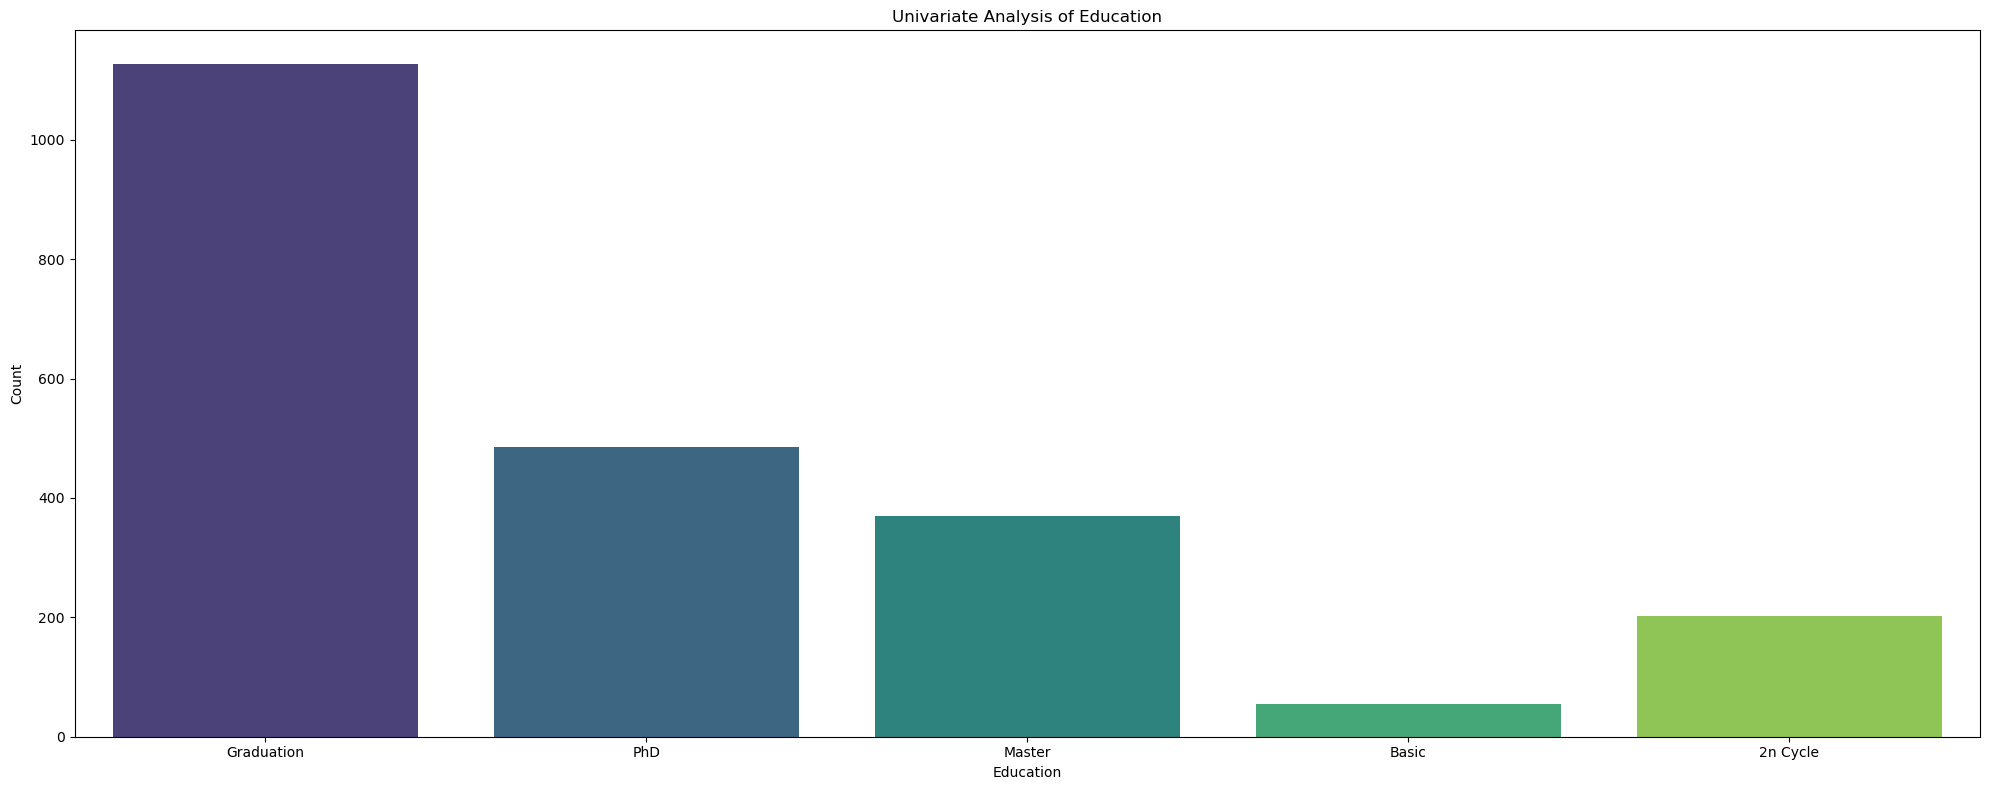

In [19]:
univariate('Education')

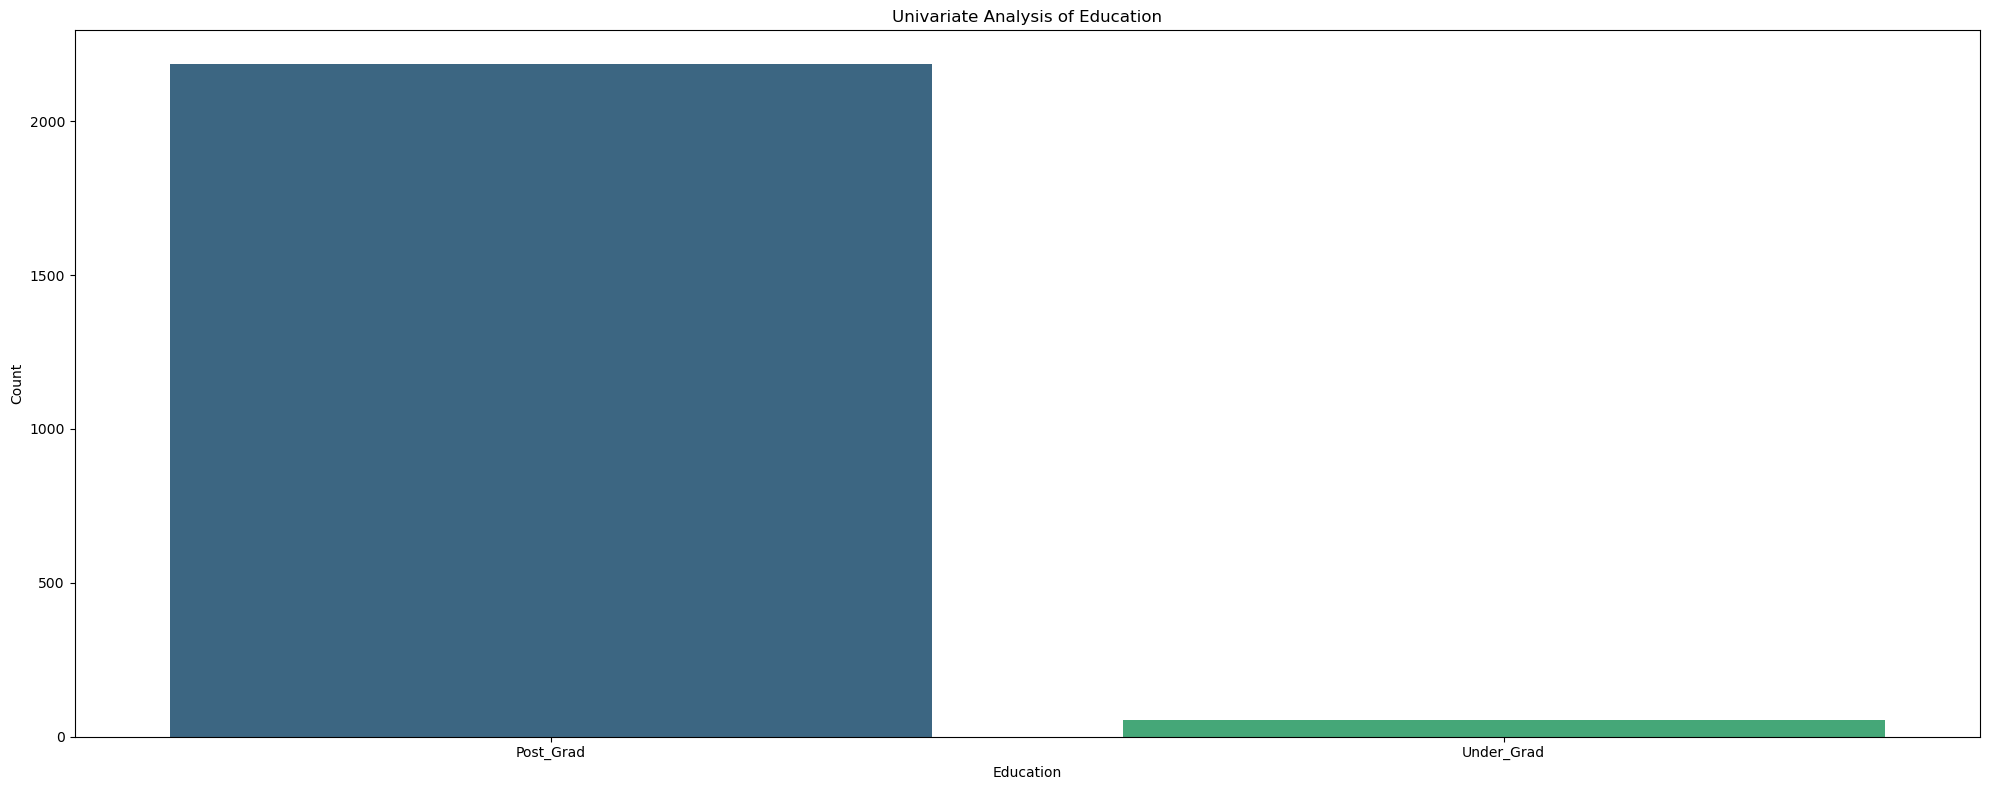

In [20]:
#Replacing the values in the Education column so that we only have 2
dataset['Education'] = dataset['Education'].replace(['Graduation', 'PhD', 'Master', '2n Cycle'], 'Post_Grad')
dataset['Education'] = dataset['Education'].replace(['Basic'], 'Under_Grad')

#Now performing univariate analysis on the Modified Education column
univariate('Education')

##### Observation for 'Education' variable - Most people have a post-graduation education level

#### 3. Analysis on the 'Marital_Status' variable

In [21]:
print("Unique categories in the Marital_Status column are: ", dataset['Marital_Status'].unique())

Unique categories in the Marital_Status column are:  ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


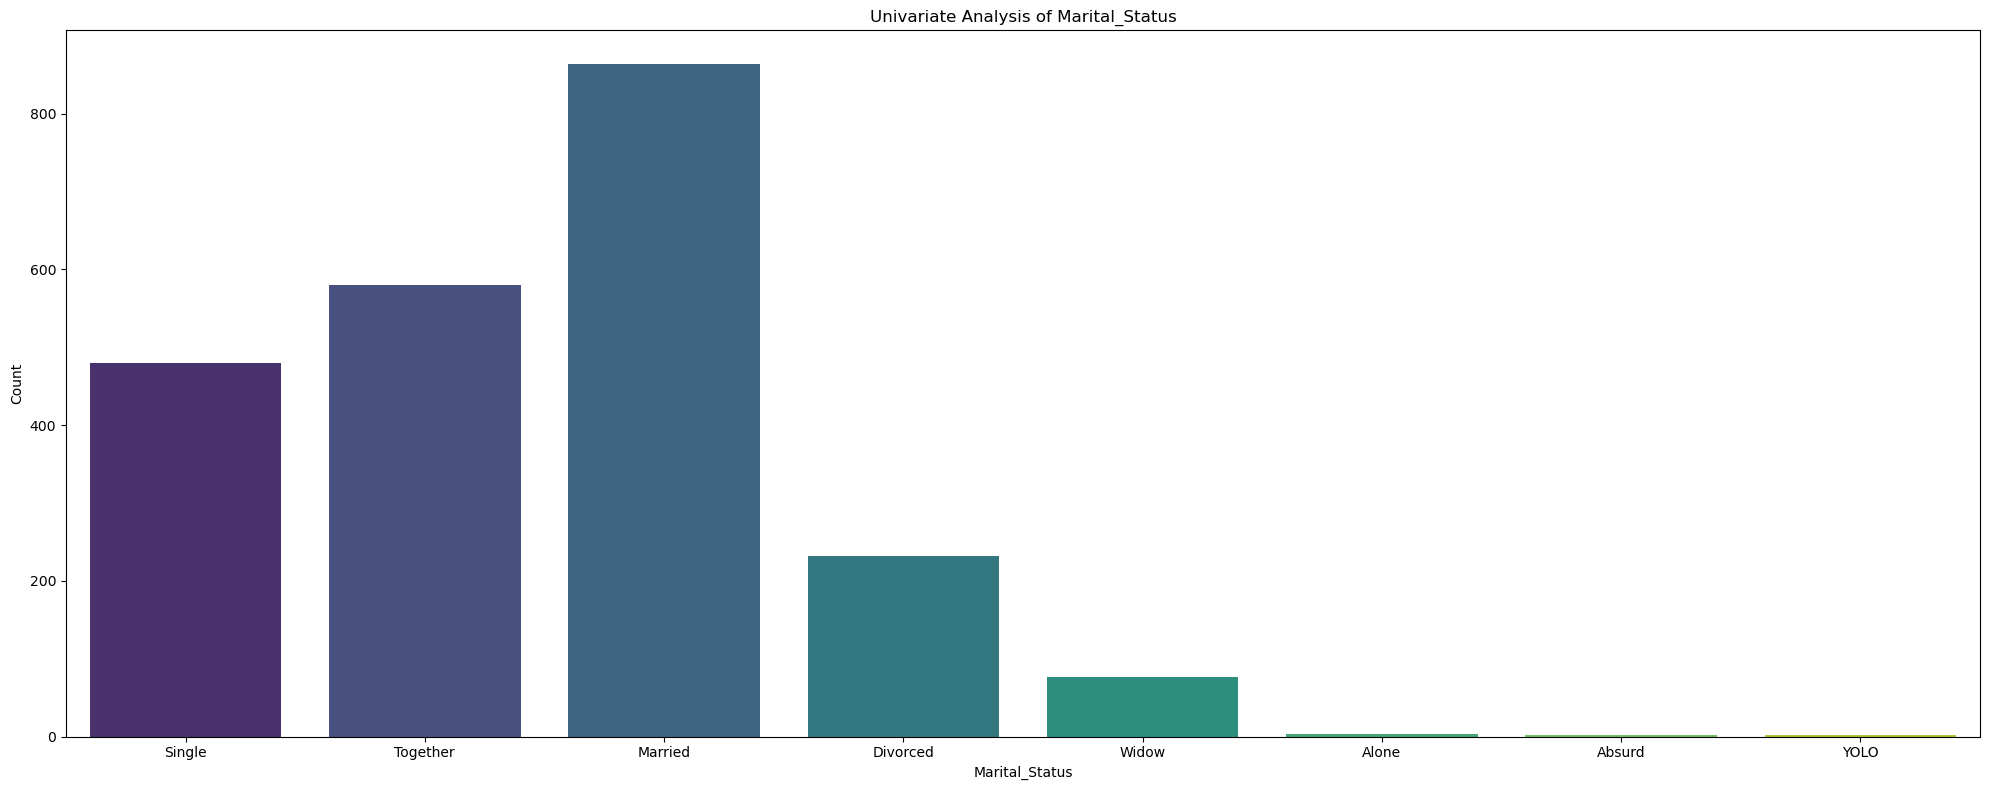

In [22]:
univariate('Marital_Status')

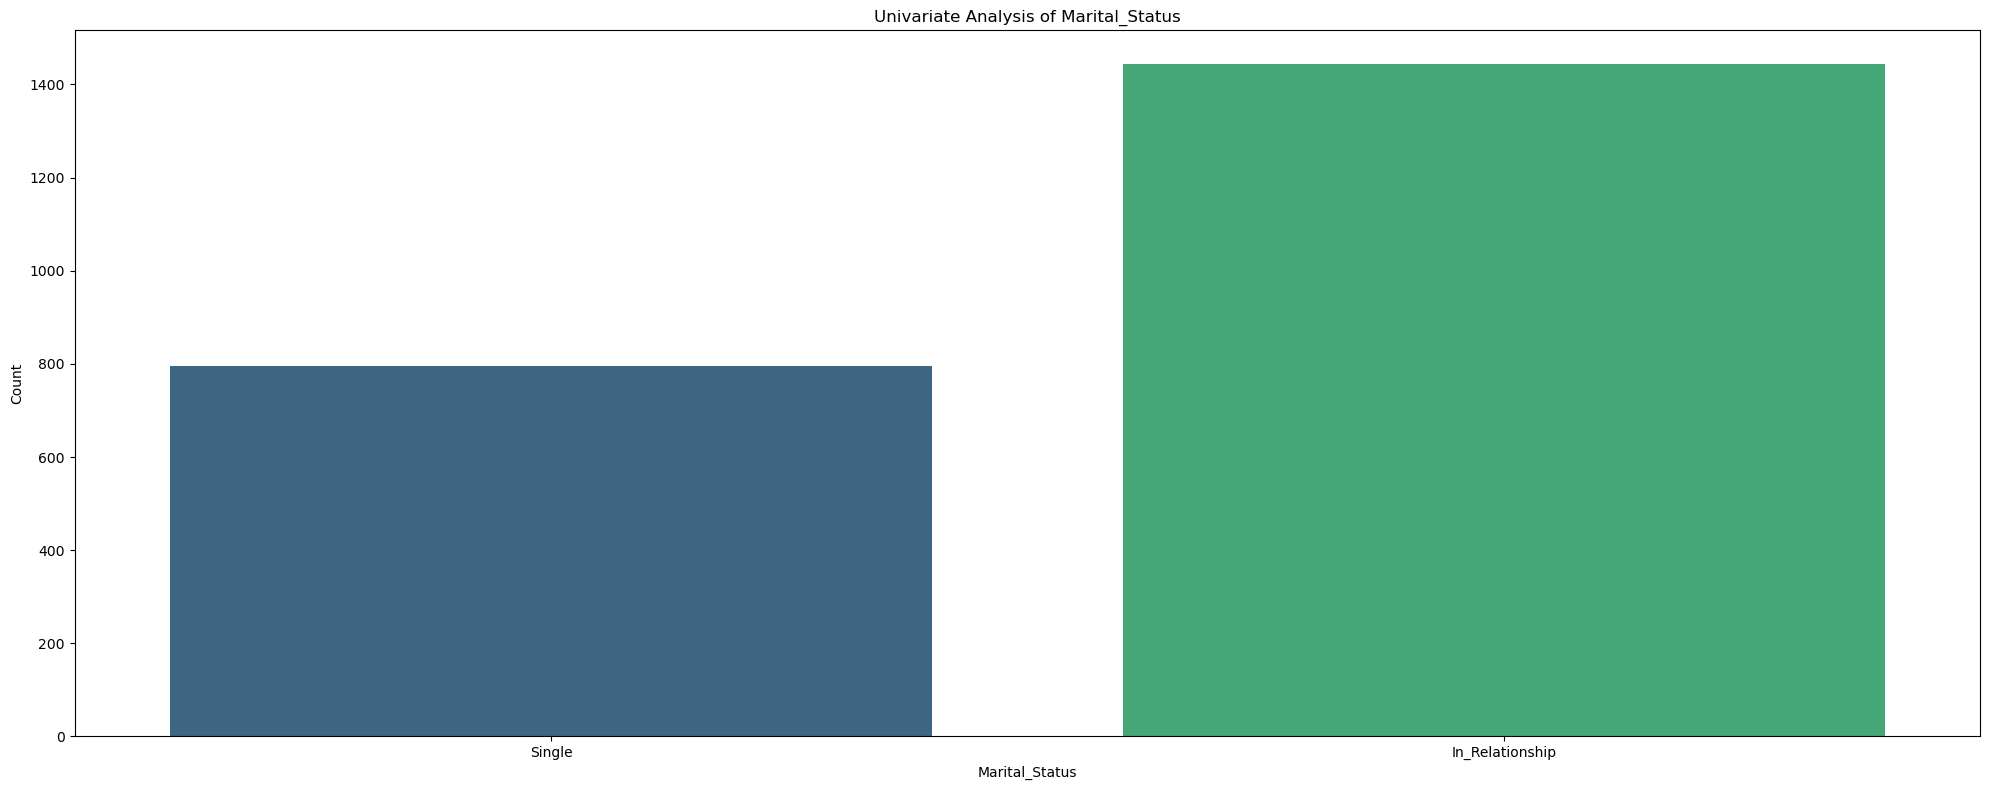

In [23]:
#Replacing the values in the Marital_Status column so that we only have 2
dataset['Marital_Status'] = dataset['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')
dataset['Marital_Status'] = dataset['Marital_Status'].replace(['Married', 'Together'], 'In_Relationship')

#Now performing univariate analysis on the Modified Education column
univariate('Marital_Status')

##### Observation on the Marital_Status column - Majority of the customers are in a relationship

#### 3. Analysis on the Income Variable

In [24]:
print("Description of the Income column: ", dataset['Income'].describe())

Description of the Income column:  count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


In [25]:
# Function to perform distribution plot
def custom_dist(col):
    plt.figure(figsize=(12, 5))
    sns.displot(dataset[col], color='green')
    plt.show()

    #Box plot
    dataset[col].plot.box(figsize=(12, 5), color='green')
    plt.show()

<Figure size 1200x500 with 0 Axes>

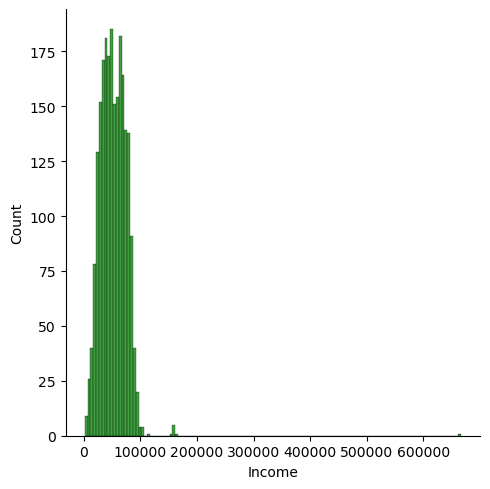

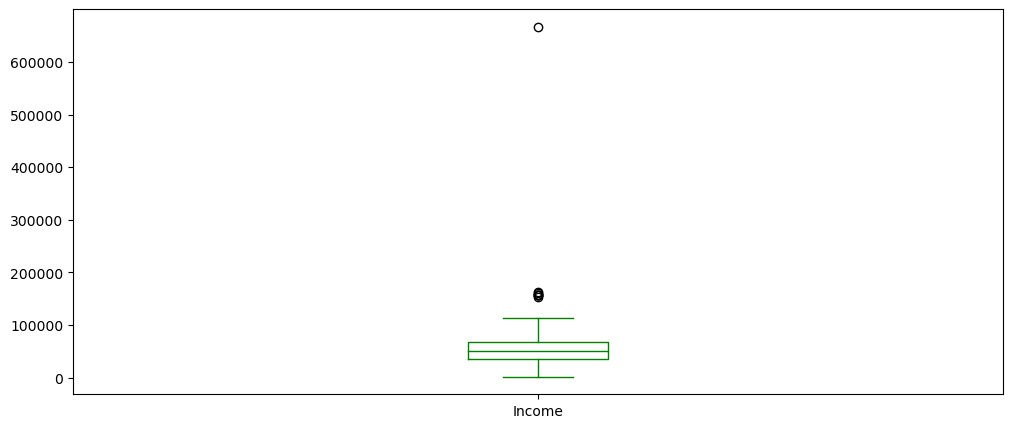

In [26]:
custom_dist('Income')

##### Observation on the Income column - It is left skewed, to be worked on later

#### 5. Analysis on the 'Kidhome' & 'Teenhome' variables

In [27]:
print("Unique categories in the Kidhome column are: ", dataset['Kidhome'].unique())

Unique categories in the Kidhome column are:  [0 1 2]


In [28]:
print("Unique categories in the Teenhome column are: ", dataset['Teenhome'].unique())

Unique categories in the Teenhome column are:  [0 1 2]


In [29]:
# Since these two variables have the same unique categories, we can combine them to reduce the dimensions of the dataset
dataset['Kids'] = dataset['Kidhome'] + dataset['Teenhome']

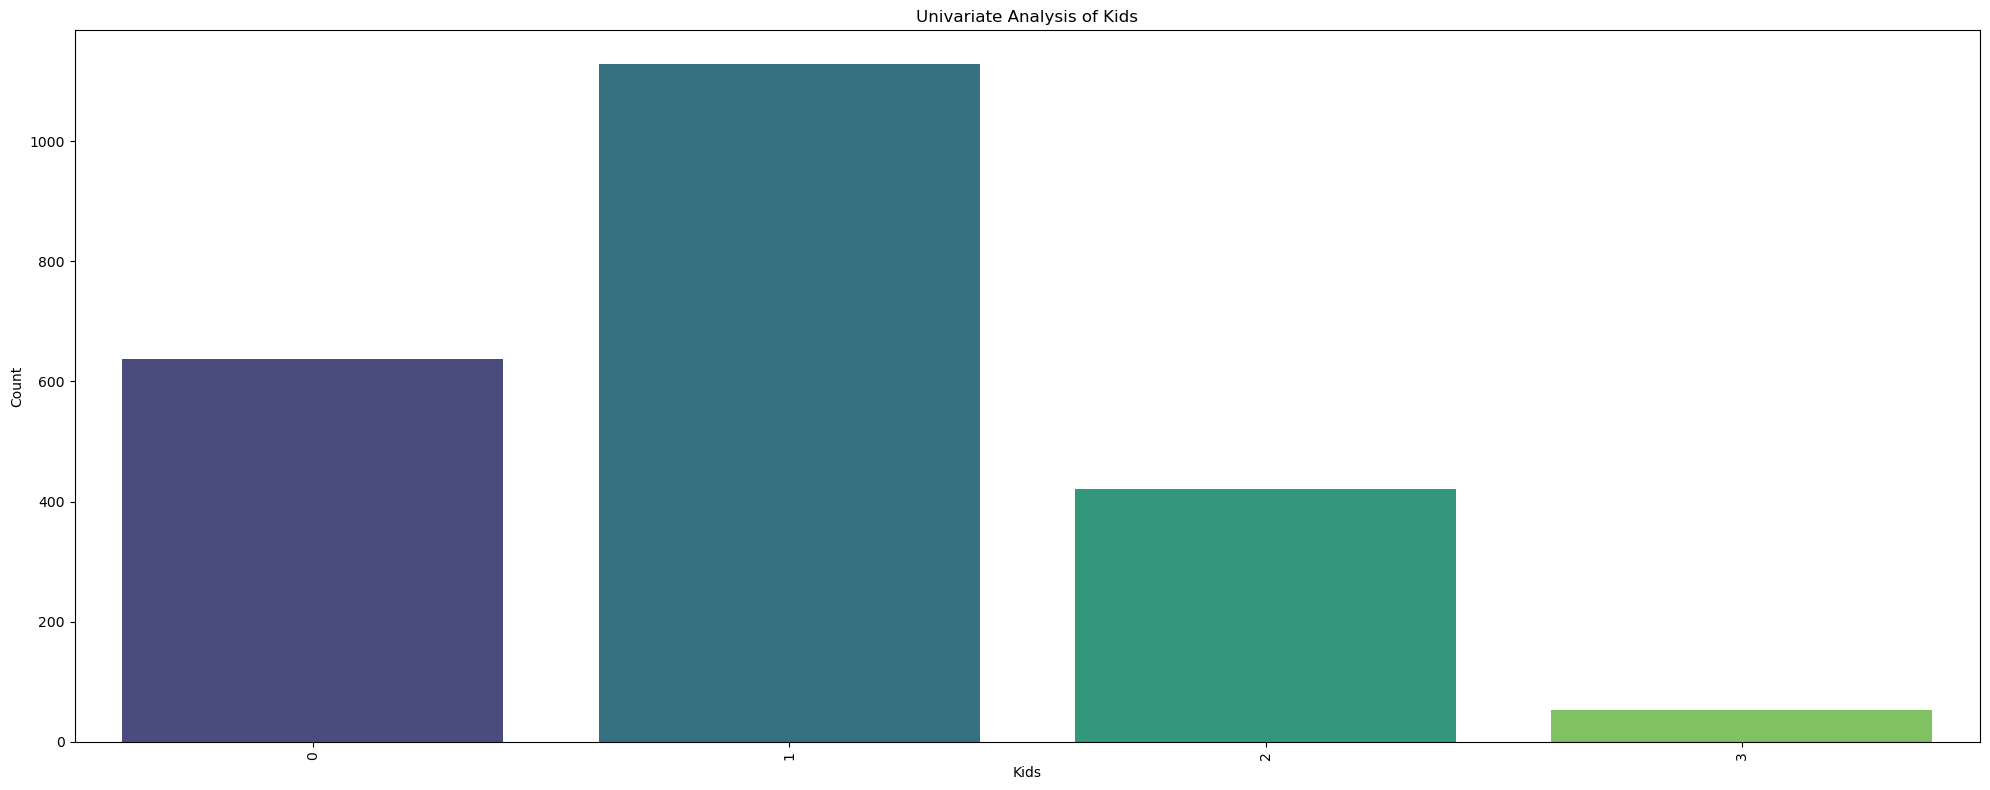

In [30]:
univariate('Kids')

#### Observation on the 'Kidhome' & 'Teenhome' variables - Most customers have 1 child

#### 6. Analysis on the 'MntWines', 'MntFruits',  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' variables

In [31]:
# Combine them to reduce dimensions in the dataset
dataset['Purchases'] = dataset['MntWines'] + dataset['MntFruits'] + dataset['MntMeatProducts'] + dataset['MntFishProducts'] + dataset['MntSweetProducts'] + dataset['MntGoldProds']
dataset['Purchases'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Purchases, dtype: int64

In [32]:
dataset['Purchases'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Purchases, dtype: float64

<Figure size 1200x500 with 0 Axes>

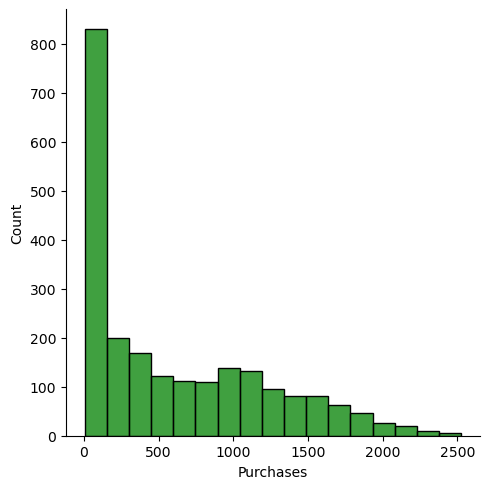

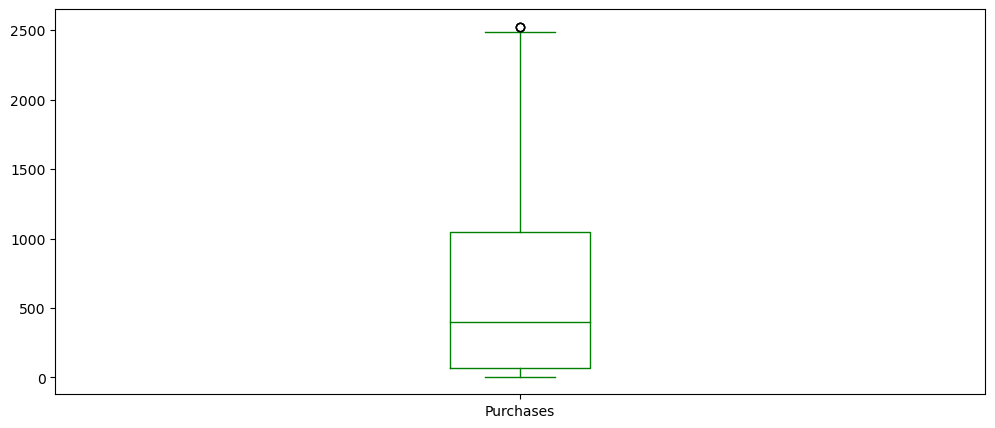

In [33]:
# Distribution plot for the purchases column
custom_dist('Purchases')

#### 7. Analysis on the 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2' variables

In [34]:
print("Unique categories in the AcceptedCmp1 column are: ", dataset['AcceptedCmp1'].unique())
print("Unique categories in the AcceptedCmp2 column are: ", dataset['AcceptedCmp2'].unique())
print("Unique categories in the AcceptedCmp3 column are: ", dataset['AcceptedCmp3'].unique())
print("Unique categories in the AcceptedCmp4 column are: ", dataset['AcceptedCmp4'].unique())
print("Unique categories in the AcceptedCmp5 column are: ", dataset['AcceptedCmp5'].unique())

Unique categories in the AcceptedCmp1 column are:  [0 1]
Unique categories in the AcceptedCmp2 column are:  [0 1]
Unique categories in the AcceptedCmp3 column are:  [0 1]
Unique categories in the AcceptedCmp4 column are:  [0 1]
Unique categories in the AcceptedCmp5 column are:  [0 1]


In [35]:
# They all have the same unique categories so we can combine them to reduce dimensions
dataset['TotalAcceptedCmp'] = dataset['AcceptedCmp1'] + dataset['AcceptedCmp2'] + dataset['AcceptedCmp3'] + dataset['AcceptedCmp4'] + dataset['AcceptedCmp5']
dataset['TotalAcceptedCmp'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: TotalAcceptedCmp, dtype: int64

In [36]:
print("Unique categories in the TotalAcceptedCmp column are: ", dataset['TotalAcceptedCmp'].value_counts())

Unique categories in the TotalAcceptedCmp column are:  0    1777
1     325
2      83
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64


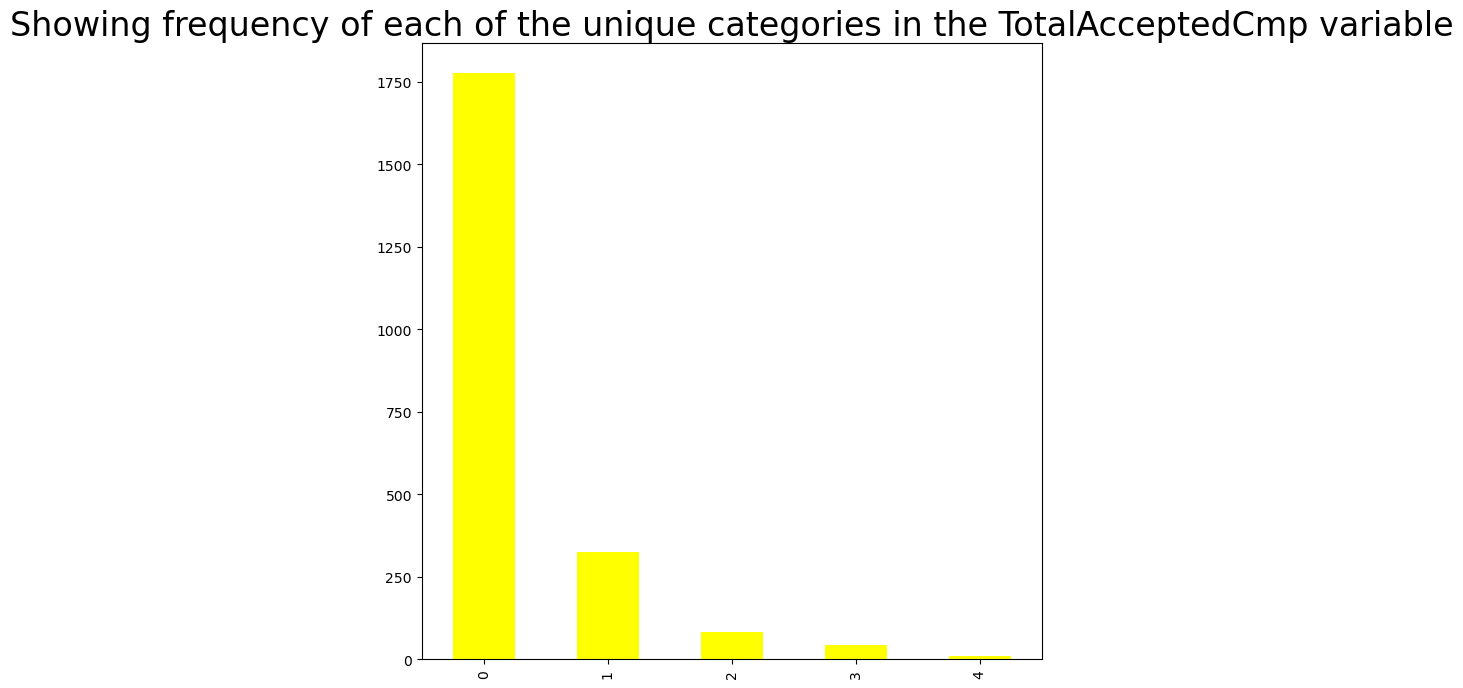

In [37]:
# To visualize the TotalAcceptedCmp
plt.figure(figsize=(8, 8))
dataset['TotalAcceptedCmp'].value_counts().plot(kind='bar', color='yellow', linewidth=3)
plt.title("Showing frequency of each of the unique categories in the TotalAcceptedCmp variable", fontsize=24)
plt.show()

##### Observation of the TotalAcceptedCmp column is that the larger set of customers didn't accept any campaign.

#### 8. Analysis on the 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth' variables

In [38]:
print("Unique categories in the NumDealsPurchases column are: ", dataset['NumDealsPurchases'].unique())
print("Unique categories in the NumWebPurchases column are: ", dataset['NumWebPurchases'].unique())
print("Unique categories in the NumCatalogPurchases column are: ", dataset['NumCatalogPurchases'].unique())
print("Unique categories in the NumStorePurchases column are: ", dataset['NumStorePurchases'].unique())
print("Unique categories in the NumWebVisitsMonth column are: ", dataset['NumWebVisitsMonth'].unique())

Unique categories in the NumDealsPurchases column are:  [ 3  2  1  5  4 15  7  0  6  9 12  8 10 13 11]
Unique categories in the NumWebPurchases column are:  [ 8  1  2  5  6  7  4  3 11  0 27 10  9 23 25]
Unique categories in the NumCatalogPurchases column are:  [10  1  2  0  3  4  6 28  9  5  8  7 11 22]
Unique categories in the NumStorePurchases column are:  [ 4  2 10  6  7  0  3  8  5 12  9 13 11  1]
Unique categories in the NumWebVisitsMonth column are:  [ 7  5  4  6  8  9 20  2  3  1 10  0 14 19 17 13]


In [39]:
# They are all numerical so we can combine them to reduce dimensions
dataset['TotalNumPurchases'] = dataset['NumDealsPurchases'] + dataset['NumWebPurchases'] + dataset['NumCatalogPurchases'] + dataset['NumStorePurchases'] + dataset['NumWebVisitsMonth']
dataset['TotalNumPurchases'].head(10)

0    32
1    11
2    25
3    14
4    24
5    28
6    27
7    18
8    15
9    22
Name: TotalNumPurchases, dtype: int64

In [40]:
dataset['TotalNumPurchases'].unique()

array([32, 11, 25, 14, 24, 28, 27, 18, 15, 22, 21, 13, 29, 17, 20, 31, 44,
       12, 23, 30, 16,  9, 19, 36, 26, 37, 10,  7, 38,  8, 33,  6, 35, 34,
       41, 46,  2,  0, 39, 40,  3,  1], dtype=int64)

In [41]:
dataset[['TotalNumPurchases']]

,TotalNumPurchases
0,32
1,11
2,25
3,14
4,24
...,...
2235,23
2236,29
2237,25
2238,26


In [39]:
dataset['TotalNumPurchases'].describe()

count    2240.000000
mean       20.178571
std         7.293275
min         0.000000
25%        14.000000
50%        19.000000
75%        25.000000
max        46.000000
Name: TotalNumPurchases, dtype: float64

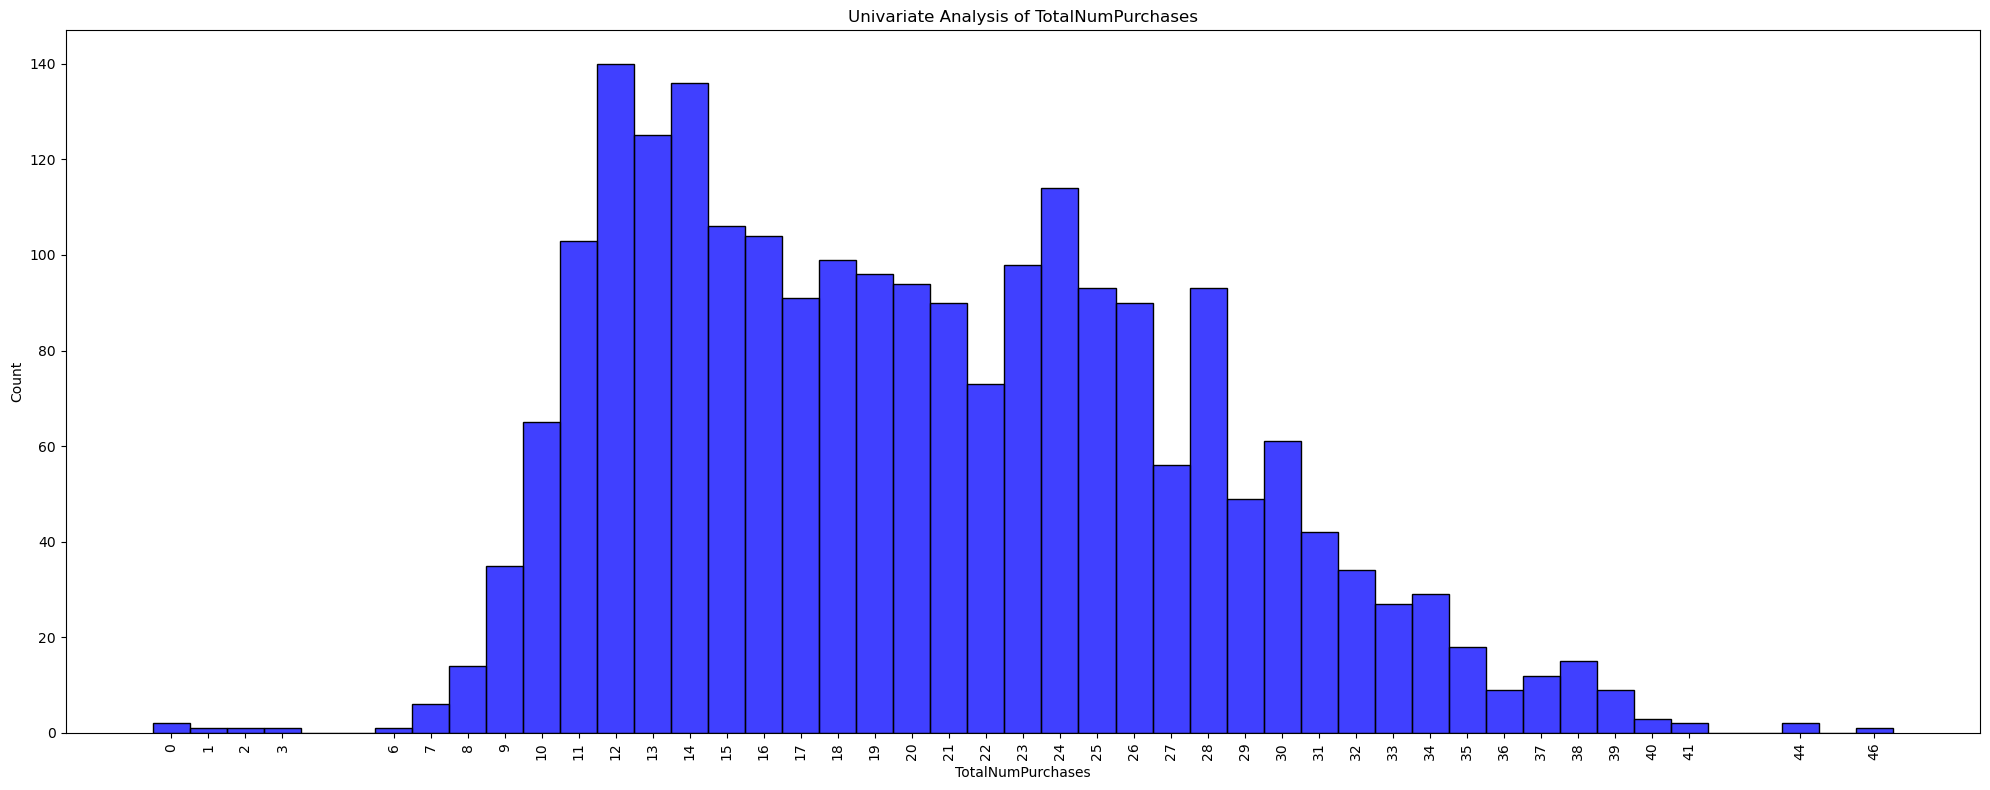

In [42]:
univariate('TotalNumPurchases')

### Now let's take a look at the modified dataset

In [43]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Purchases,TotalAcceptedCmp,TotalNumPurchases
0,5524,1957,Post_Grad,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,1,0,1617,0,32
1,2174,1954,Post_Grad,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,2,27,0,11
2,4141,1965,Post_Grad,In_Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,776,0,25
3,6182,1984,Post_Grad,In_Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,1,53,0,14
4,5324,1981,Post_Grad,In_Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,1,422,0,24


In [44]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Kids', 'Purchases',
       'TotalAcceptedCmp', 'TotalNumPurchases'],
      dtype='object')

In [45]:
# Getting the customer's age from the birth year
dataset['Customer_Age'] = (pd.Timestamp('now').year) - dataset['Year_Birth']
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Purchases,TotalAcceptedCmp,TotalNumPurchases,Customer_Age
0,5524,1957,Post_Grad,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,1,0,1617,0,32,67
1,2174,1954,Post_Grad,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,2,27,0,11,70
2,4141,1965,Post_Grad,In_Relationship,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,776,0,25,59
3,6182,1984,Post_Grad,In_Relationship,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,1,53,0,14,40
4,5324,1981,Post_Grad,In_Relationship,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,1,422,0,24,43


<Figure size 1200x500 with 0 Axes>

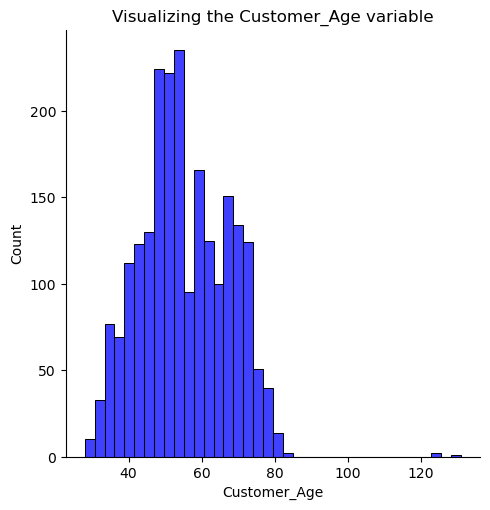

In [46]:
# Visualizing the Customer_Age variable
plt.figure(figsize=(12, 5))
sns.displot(dataset['Customer_Age'], color="blue")
plt.title("Visualizing the Customer_Age variable")
plt.show()

##### Observation on the Customer_Age variable - Most customers are middle-aged

### As I modified most columns, combined others and created others, more variables were added to the dataset therefore increasing the dimensionality. Now I can DROP/DELETE the columns/variables I do not need. 

In [47]:
print("Deleting variables that are no longer required...")
columns_del = ['ID', 'Year_Birth', 'Kidhome','Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
dataset = dataset.drop(columns=columns_del, axis=1)

Deleting variables that are no longer required...


In [48]:
dataset

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Purchases,TotalAcceptedCmp,TotalNumPurchases,Customer_Age
0,Post_Grad,Single,58138.0,04-09-2012,58,0,1,0,1617,0,32,67
1,Post_Grad,Single,46344.0,08-03-2014,38,0,0,2,27,0,11,70
2,Post_Grad,In_Relationship,71613.0,21-08-2013,26,0,0,0,776,0,25,59
3,Post_Grad,In_Relationship,26646.0,10-02-2014,26,0,0,1,53,0,14,40
4,Post_Grad,In_Relationship,58293.0,19-01-2014,94,0,0,1,422,0,24,43
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Post_Grad,In_Relationship,61223.0,13-06-2013,46,0,0,1,1341,0,23,57
2236,Post_Grad,In_Relationship,64014.0,10-06-2014,56,0,0,3,444,1,29,78
2237,Post_Grad,Single,56981.0,25-01-2014,91,0,0,0,1241,1,25,43
2238,Post_Grad,In_Relationship,69245.0,24-01-2014,8,0,0,1,843,0,26,68


In [49]:
print("Columns in the dataset now are: ")
dataset.columns

Columns in the dataset now are: 


Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Complain', 'Response', 'Kids', 'Purchases', 'TotalAcceptedCmp',
       'TotalNumPurchases', 'Customer_Age'],
      dtype='object')

In [50]:
print("Modified dataset info: ")
dataset.info()

Modified dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Dt_Customer        2240 non-null   object 
 4   Recency            2240 non-null   int64  
 5   Complain           2240 non-null   int64  
 6   Response           2240 non-null   int64  
 7   Kids               2240 non-null   int64  
 8   Purchases          2240 non-null   int64  
 9   TotalAcceptedCmp   2240 non-null   int64  
 10  TotalNumPurchases  2240 non-null   int64  
 11  Customer_Age       2240 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 210.1+ KB


#### Creating a feature from the Dt_Customer variable, which is the number of days from when a customer is registered in the firm's database. It will reflect the most recent customers on record

In [53]:
# To get the newest values, check both the newest and oldest dates.
dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'], format='%d/%m/%Y')

dates = []
for i in dataset['Dt_Customer']:
    i = i.date()
    dates.append(i)
    
print("The newest customer record is: ", max(dates))
print("The oldest customer record is: ", min(dates))

The newest customer record is:  2014-12-06
The oldest customer record is:  2012-01-08


In [54]:
dates

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 8, 5),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 3, 11),
 datetime.date(2012, 8, 8),
 datetime.date(2013, 6, 1),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 11, 1),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 2, 1),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 11, 5),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.

#### Creating a new feature 'Customer_For' to store the number of days the customer has been in the record

In [55]:
print("New variable - Customer_For")
days = []

day = max(dates)#the newest/latest date
for i in dates:
    delta = day - i
    days.append(delta)
    
dataset['Customer_For'] = days
dataset['Customer_For'] = dataset['Customer_For'].apply(lambda d:d.days)

New variable - Customer_For


In [56]:
dataset

,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Purchases,TotalAcceptedCmp,TotalNumPurchases,Customer_Age,Customer_For
0,Post_Grad,Single,58138.0,2012-04-09,58,0,1,0,1617,0,32,67,971
1,Post_Grad,Single,46344.0,2014-08-03,38,0,0,2,27,0,11,70,125
2,Post_Grad,In_Relationship,71613.0,2013-08-21,26,0,0,0,776,0,25,59,472
3,Post_Grad,In_Relationship,26646.0,2014-10-02,26,0,0,1,53,0,14,40,65
4,Post_Grad,In_Relationship,58293.0,2014-01-19,94,0,0,1,422,0,24,43,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Post_Grad,In_Relationship,61223.0,2013-06-13,46,0,0,1,1341,0,23,57,541
2236,Post_Grad,In_Relationship,64014.0,2014-10-06,56,0,0,3,444,1,29,78,61
2237,Post_Grad,Single,56981.0,2014-01-25,91,0,0,0,1241,1,25,43,315
2238,Post_Grad,In_Relationship,69245.0,2014-01-24,8,0,0,1,843,0,26,68,316


In [57]:
dataset['Customer_For'].describe()

count    2240.000000
mean      512.043304
std       232.229893
min         0.000000
25%       340.750000
50%       513.000000
75%       685.250000
max      1063.000000
Name: Customer_For, dtype: float64

#### Now we can drop the remaining unecessary columns

In [58]:
dataset.drop(['Dt_Customer', 'Recency', 'Complain', 'Response'], axis=1, inplace=True)

In [59]:
dataset

,Education,Marital_Status,Income,Kids,Purchases,TotalAcceptedCmp,TotalNumPurchases,Customer_Age,Customer_For
0,Post_Grad,Single,58138.0,0,1617,0,32,67,971
1,Post_Grad,Single,46344.0,2,27,0,11,70,125
2,Post_Grad,In_Relationship,71613.0,0,776,0,25,59,472
3,Post_Grad,In_Relationship,26646.0,1,53,0,14,40,65
4,Post_Grad,In_Relationship,58293.0,1,422,0,24,43,321
...,...,...,...,...,...,...,...,...,...
2235,Post_Grad,In_Relationship,61223.0,1,1341,0,23,57,541
2236,Post_Grad,In_Relationship,64014.0,3,444,1,29,78,61
2237,Post_Grad,Single,56981.0,0,1241,1,25,43,315
2238,Post_Grad,In_Relationship,69245.0,1,843,0,26,68,316


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Kids               2240 non-null   int64  
 4   Purchases          2240 non-null   int64  
 5   TotalAcceptedCmp   2240 non-null   int64  
 6   TotalNumPurchases  2240 non-null   int64  
 7   Customer_Age       2240 non-null   int64  
 8   Customer_For       2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


Visualizing the newly created variable - Customer_For...


<Figure size 1200x500 with 0 Axes>

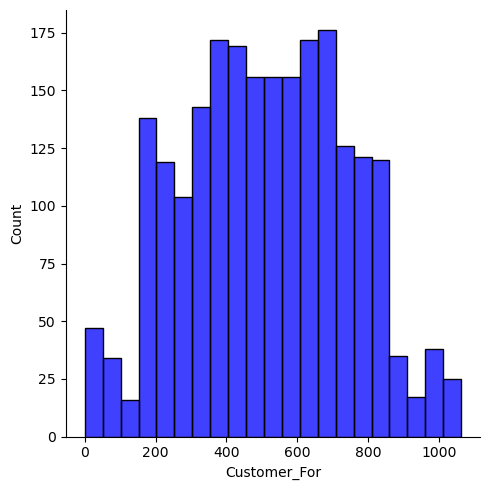

In [61]:
print("Visualizing the newly created variable - Customer_For...")

plt.figure(figsize=(12, 5))
sns.displot(dataset['Customer_For'], color='blue')
plt.show()

#### Observation of the Customer_For variable - Most customers were involved with the campaign for around 200 to 850 days

In [62]:
print("Checking the shape of the modified dataset...")
dataset.shape

Checking the shape of the modified dataset...


(2240, 9)

## Bivariate Analysis of the modified dataset

### 1. Analysis of Education and Purchases

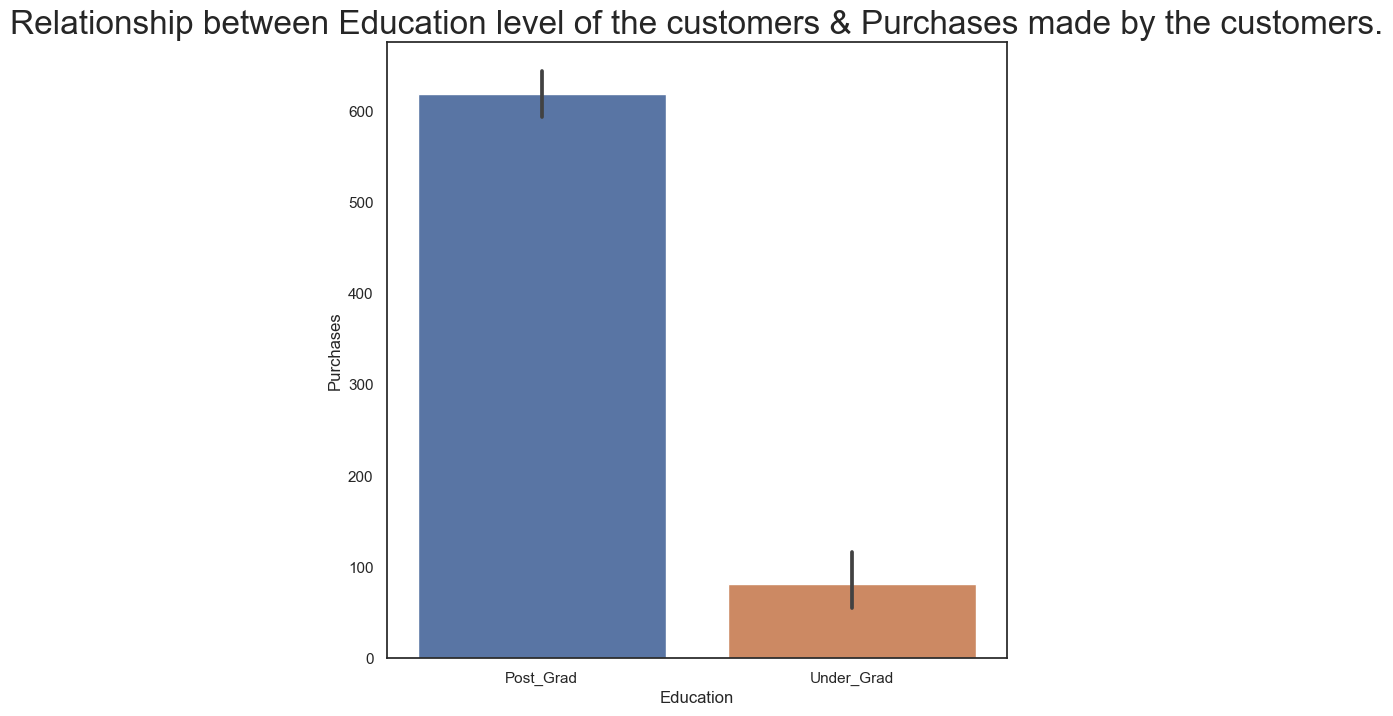

In [63]:
sns.set_theme(style="white")
plt.figure(figsize=(8, 8))
plt.title("Relationship between Education level of the customers & Purchases made by the customers.", fontsize=24)
ax = sns.barplot(x="Education", y="Purchases", data=dataset)

##### Observation - Post Graduate customers spend more

### 2. Analysis between Marital_Status and Purchases

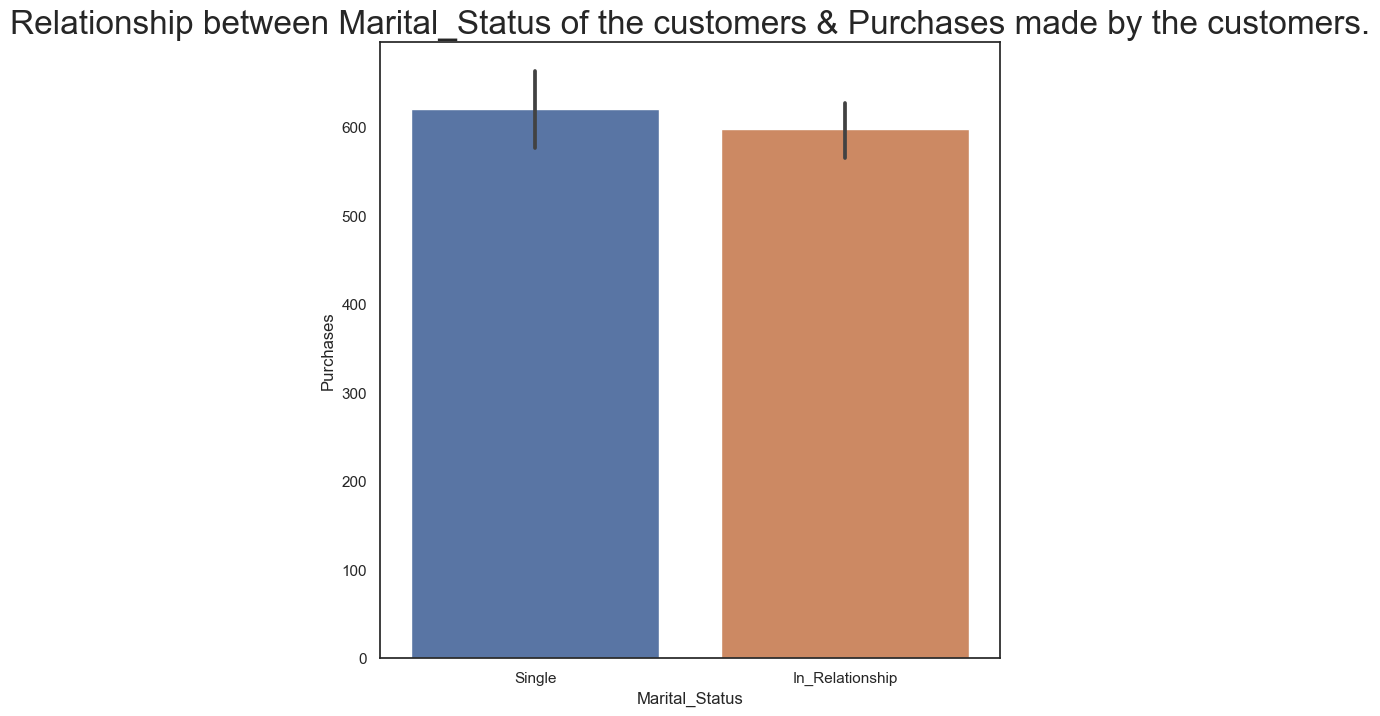

In [64]:
sns.set_theme(style="white")
plt.figure(figsize=(8, 8))
plt.title("Relationship between Marital_Status of the customers & Purchases made by the customers.", fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Purchases", data=dataset)

#### Observation - Single customers spend slightly  more than customers that are in a relationship

### 3. Analysis between (customers with) Kids and Purchases

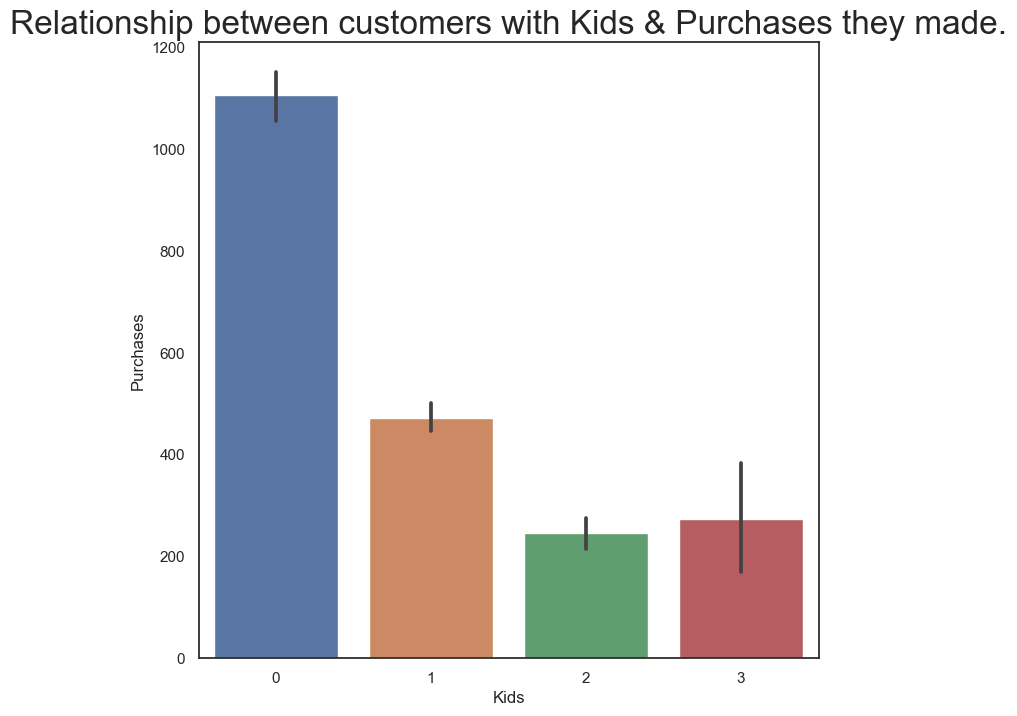

In [65]:
sns.set_theme(style="white")
plt.figure(figsize=(8, 8))
plt.title("Relationship between customers with Kids & Purchases they made.", fontsize=24)
ax = sns.barplot(x="Kids", y="Purchases", data=dataset)

#### Observation - Customers WITHOUT kids spend more than those WITH kids

### 4. Analysis between TotalAcceptedCmp and Purchases

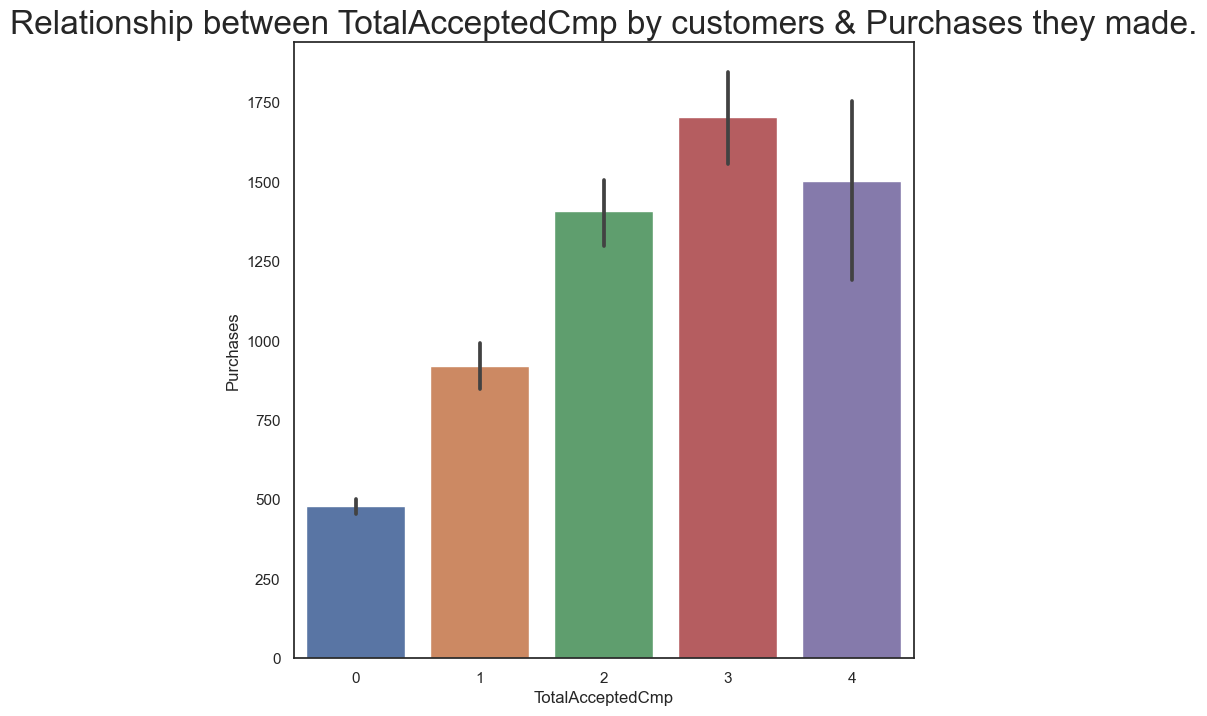

In [66]:
sns.set_theme(style="white")
plt.figure(figsize=(8, 8))
plt.title("Relationship between TotalAcceptedCmp by customers & Purchases they made.", fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Purchases", data=dataset)

#### Observation - The more campaigns a customer accepted, the more their purchases

### 5. Analysis between TotalNumPurchases and Purchases

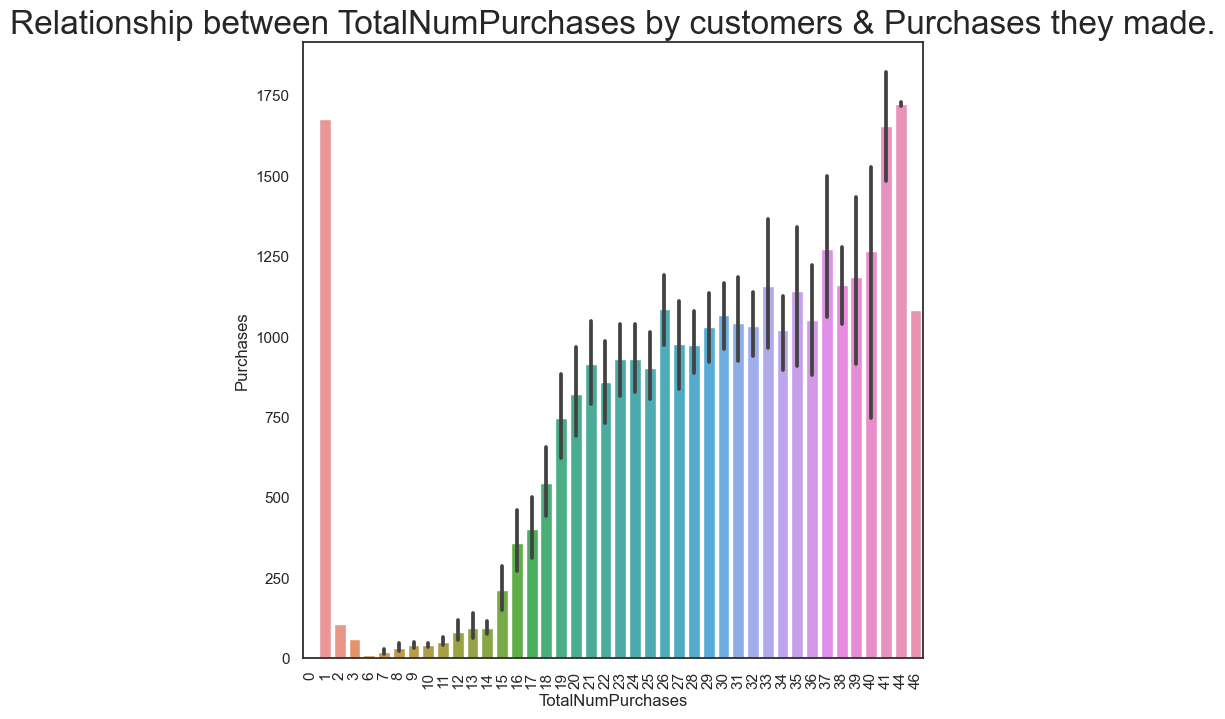

In [67]:
sns.set_theme(style="white")
plt.figure(figsize=(8, 8))
plt.title("Relationship between TotalNumPurchases by customers & Purchases they made.", fontsize=24)
plt.xticks(rotation=90)
ax = sns.barplot(x="TotalNumPurchases", y="Purchases", data=dataset)

#### Observation - The more the total number of purchases, the more the expenses in purchases

### 6. Analysis between Customer_For and Purchases

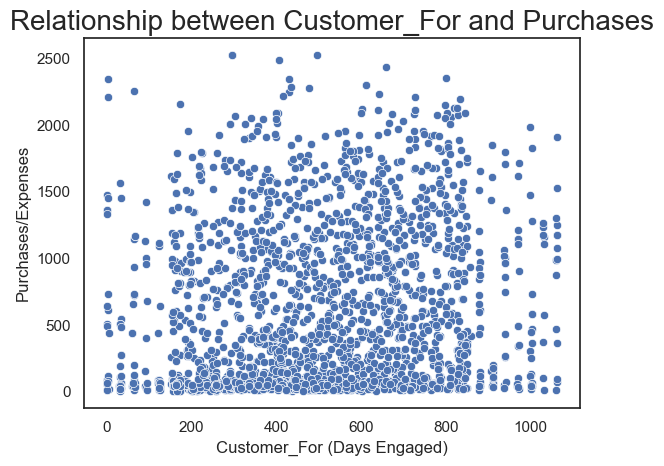

In [69]:
sns.scatterplot(x=dataset['Customer_For'], y=dataset['Purchases'])
plt.title("Relationship between Customer_For and Purchases", fontsize=20)
plt.xlabel('Customer_For (Days Engaged)')
plt.ylabel('Purchases/Expenses')
plt.show()

### 7. Analysis between Customer Age and Purchases

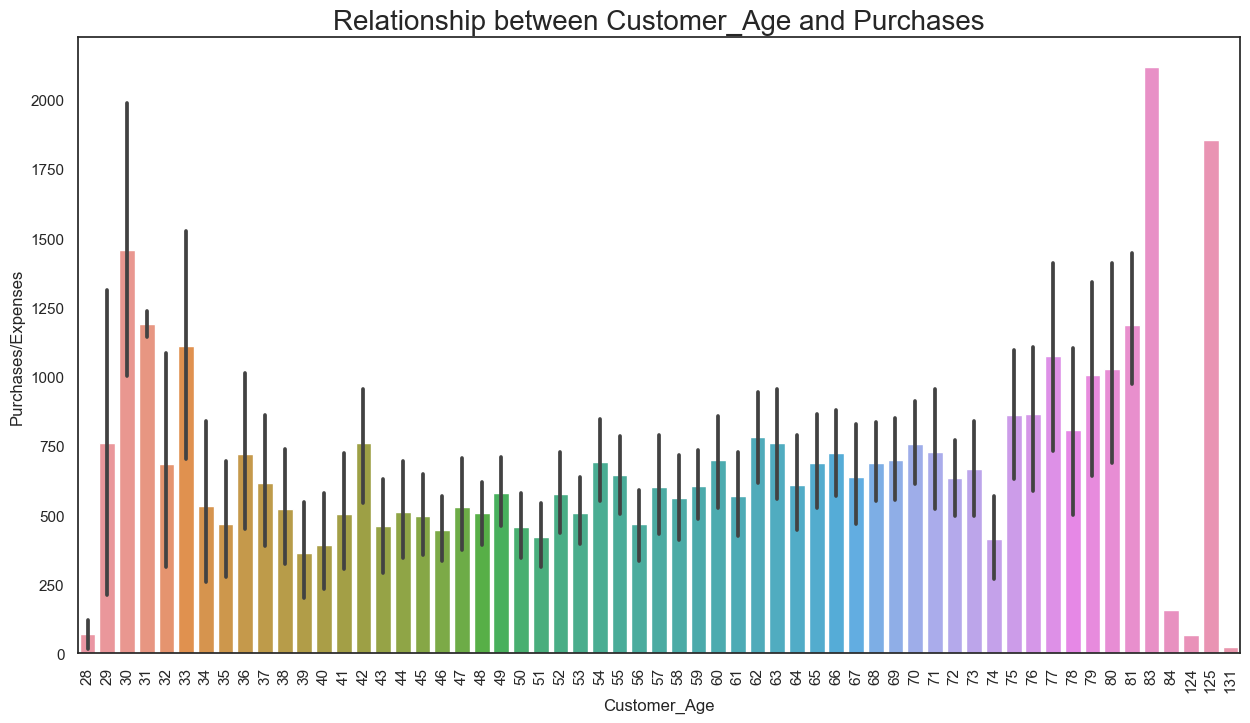

In [71]:
sns.set_theme(style='white')
plt.figure(figsize=(15, 8))
plt.title("Relationship between Customer_Age and Purchases", fontsize=20)
plt.xticks(rotation=90)
ax = sns.barplot(x='Customer_Age', y='Purchases', data=dataset)
plt.xlabel('Customer_Age')
plt.ylabel('Purchases/Expenses')
plt.show()

##### Observation - Middle-aged people seem to have spent less

### Removing outliers noticed in the customer age and income

In [72]:
#Describe the income variable
dataset['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [73]:
#Describe the Customer_For variable
dataset['Customer_For'].describe()

count    2240.000000
mean      512.043304
std       232.229893
min         0.000000
25%       340.750000
50%       513.000000
75%       685.250000
max      1063.000000
Name: Customer_For, dtype: float64

In [74]:
dataset.shape

(2240, 9)

In [75]:
dataset = dataset[dataset['Customer_Age'] < 90]
dataset = dataset[dataset['Income'] < 300000]

In [76]:
dataset.shape

(2236, 9)

In [78]:
dataset.head()

,Education,Marital_Status,Income,Kids,Purchases,TotalAcceptedCmp,TotalNumPurchases,Customer_Age,Customer_For
0,Post_Grad,Single,58138.0,0,1617,0,32,67,971
1,Post_Grad,Single,46344.0,2,27,0,11,70,125
2,Post_Grad,In_Relationship,71613.0,0,776,0,25,59,472
3,Post_Grad,In_Relationship,26646.0,1,53,0,14,40,65
4,Post_Grad,In_Relationship,58293.0,1,422,0,24,43,321


### Correlation matrix

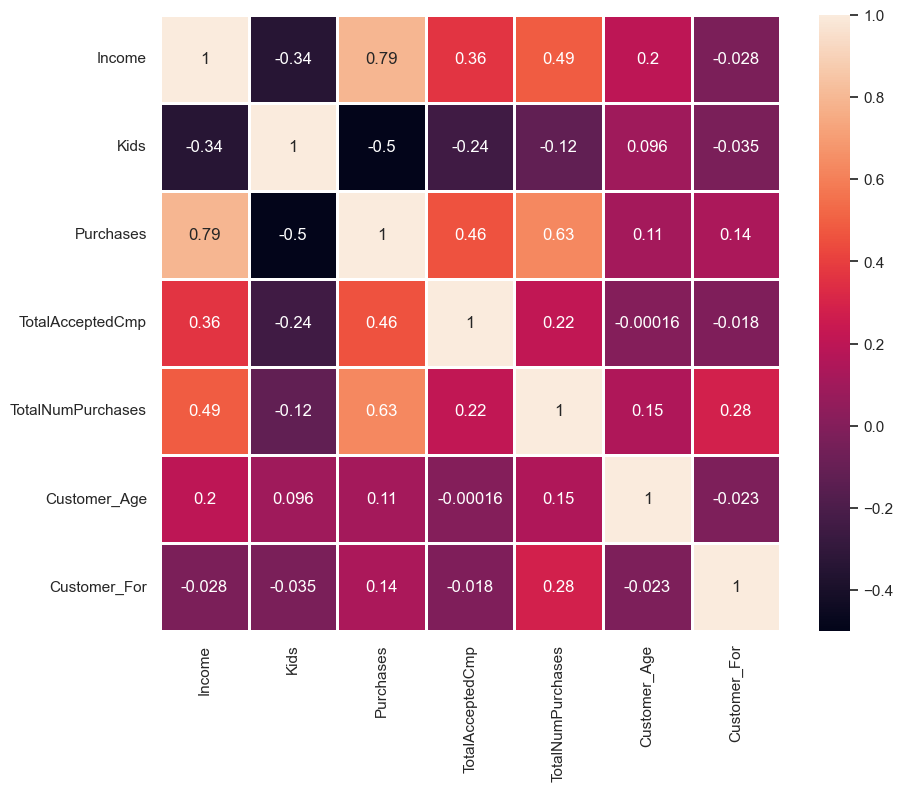

In [80]:
plt.figure(figsize = (10, 8))
# Explicitly specify numeric_only=True to remove the warning
sns.heatmap(dataset.corr(numeric_only=True), annot=True, linewidth=1)
plt.show()

#### Observation - Income and Purchases are positively correlated

In [81]:
dataset

,Education,Marital_Status,Income,Kids,Purchases,TotalAcceptedCmp,TotalNumPurchases,Customer_Age,Customer_For
0,Post_Grad,Single,58138.0,0,1617,0,32,67,971
1,Post_Grad,Single,46344.0,2,27,0,11,70,125
2,Post_Grad,In_Relationship,71613.0,0,776,0,25,59,472
3,Post_Grad,In_Relationship,26646.0,1,53,0,14,40,65
4,Post_Grad,In_Relationship,58293.0,1,422,0,24,43,321
...,...,...,...,...,...,...,...,...,...
2235,Post_Grad,In_Relationship,61223.0,1,1341,0,23,57,541
2236,Post_Grad,In_Relationship,64014.0,3,444,1,29,78,61
2237,Post_Grad,Single,56981.0,0,1241,1,25,43,315
2238,Post_Grad,In_Relationship,69245.0,1,843,0,26,68,316


### Encoding the Education and Marital_Status variables

In [82]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

dataset['Education'] = label_encoder.fit_transform(dataset['Education'])
dataset['Marital_Status'] = label_encoder.fit_transform(dataset['Marital_Status'])

In [83]:
dataset

,Education,Marital_Status,Income,Kids,Purchases,TotalAcceptedCmp,TotalNumPurchases,Customer_Age,Customer_For
0,0,1,58138.0,0,1617,0,32,67,971
1,0,1,46344.0,2,27,0,11,70,125
2,0,0,71613.0,0,776,0,25,59,472
3,0,0,26646.0,1,53,0,14,40,65
4,0,0,58293.0,1,422,0,24,43,321
...,...,...,...,...,...,...,...,...,...
2235,0,0,61223.0,1,1341,0,23,57,541
2236,0,0,64014.0,3,444,1,29,78,61
2237,0,1,56981.0,0,1241,1,25,43,315
2238,0,0,69245.0,1,843,0,26,68,316


### Scale the remaining numerical columns

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_scale = ['Income', 'Kids', 'Purchases', 'TotalAcceptedCmp', 'TotalNumPurchases', 'Customer_Age', 'Customer_For']

dataset[col_scale] = scaler.fit_transform(dataset[col_scale])

In [85]:
dataset

,Education,Marital_Status,Income,Kids,Purchases,TotalAcceptedCmp,TotalNumPurchases,Customer_Age,Customer_For
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.619794,1.016868,1.975467
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.260794,1.273264,-1.667017
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.659598,0.333146,-0.172996
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.849281,-1.290693,-1.925349
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.522427,-1.034298,-0.823131
...,...,...,...,...,...,...,...,...,...
2235,0,0,0.433060,0.065416,1.221499,-0.438933,0.385256,0.162216,0.124086
2236,0,0,0.563440,2.724862,-0.269201,1.034721,1.208281,1.956986,-1.942571
2237,0,1,0.234898,-1.264308,1.055312,1.034721,0.659598,-1.034298,-0.848965
2238,0,0,0.807803,0.065416,0.393886,-0.438933,0.796769,1.102333,-0.844659


## Building the Model

### Machine Learning Model => K-Means

In [86]:
#Creating copy of the dataset
dataset_copy = dataset.copy()

In [87]:
from sklearn.cluster import KMeans

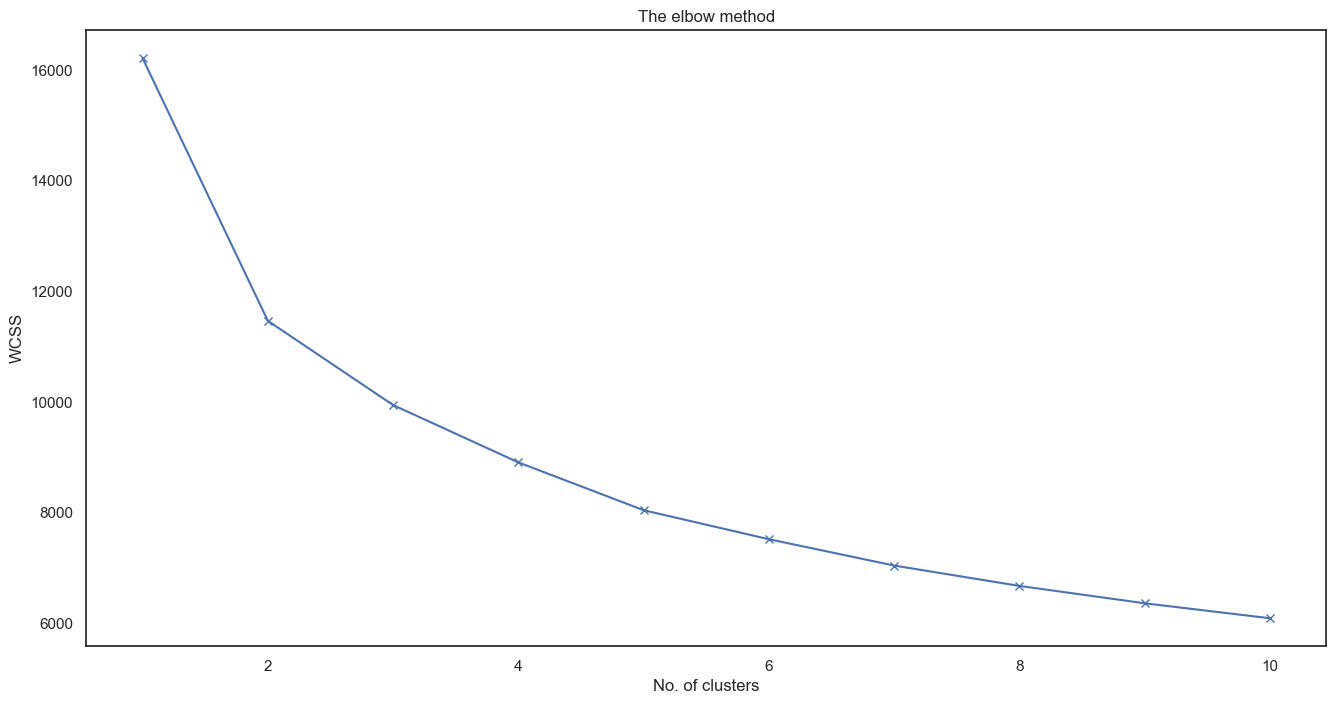

In [89]:
#Checking the number of clusters using the elbow method
wcss=[] #wcss - Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, init='k-means++', random_state=42)
    kmeans.fit(dataset_copy)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(16, 8))
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

#### Observation - From the plot, cluster 2 is the best (k = 2)

### Taking cluster 2 and performing the prediction

In [94]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(dataset_copy)
pred = kmeans.predict(dataset_copy)

#Append cluster values to the original dataset
dataset_copy['cluster_Kmeans'] = pred + 1

In [95]:
dataset_copy

,Education,Marital_Status,Income,Kids,Purchases,TotalAcceptedCmp,TotalNumPurchases,Customer_Age,Customer_For,cluster_Kmeans
0,0,1,0.288947,-1.264308,1.680176,-0.438933,1.619794,1.016868,1.975467,1
1,0,1,-0.262003,1.395139,-0.962202,-0.438933,-1.260794,1.273264,-1.667017,2
2,0,0,0.918423,-1.264308,0.282541,-0.438933,0.659598,0.333146,-0.172996,1
3,0,0,-1.182183,0.065416,-0.918994,-0.438933,-0.849281,-1.290693,-1.925349,2
4,0,0,0.296187,0.065416,-0.305762,-0.438933,0.522427,-1.034298,-0.823131,2
...,...,...,...,...,...,...,...,...,...,...
2235,0,0,0.433060,0.065416,1.221499,-0.438933,0.385256,0.162216,0.124086,1
2236,0,0,0.563440,2.724862,-0.269201,1.034721,1.208281,1.956986,-1.942571,1
2237,0,1,0.234898,-1.264308,1.055312,1.034721,0.659598,-1.034298,-0.848965,1
2238,0,0,0.807803,0.065416,0.393886,-0.438933,0.796769,1.102333,-0.844659,1


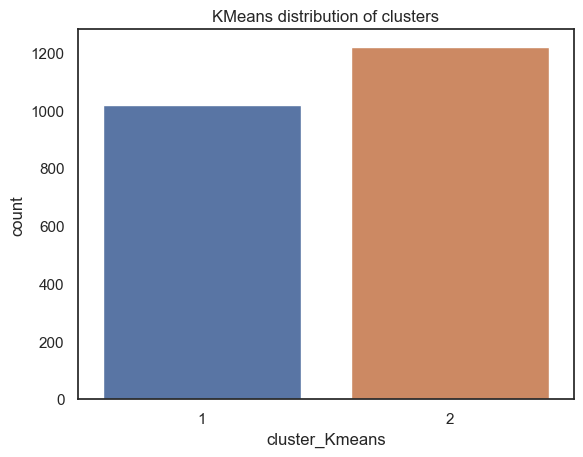

In [96]:
#Visualizing the new variable - cluster_Kmeans
sns.countplot(x = dataset_copy['cluster_Kmeans'])
plt.title('KMeans distribution of clusters')
plt.show()

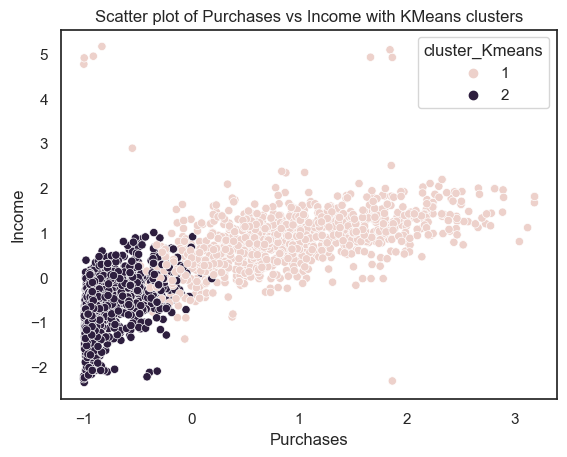

In [98]:
sns.scatterplot(x=dataset_copy['Purchases'], y=dataset['Income'], hue=dataset_copy['cluster_Kmeans'])
plt.title('Scatter plot of Purchases vs Income with KMeans clusters')
plt.xlabel('Purchases')
plt.ylabel('Income')
plt.show()

## Drawing outcomes

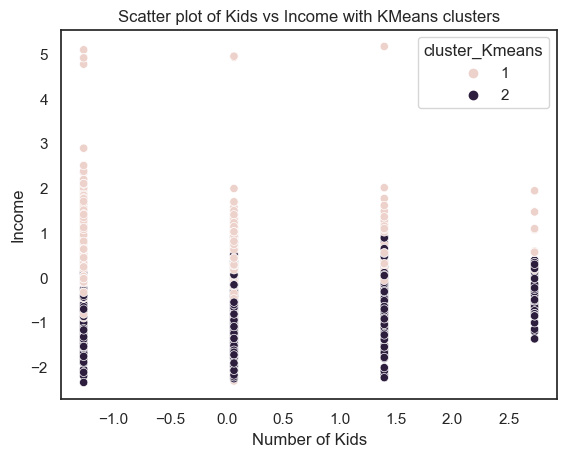

In [100]:
sns.scatterplot(x=dataset_copy['Kids'], y=dataset_copy['Income'], hue=dataset_copy['cluster_Kmeans'])
plt.title('Scatter plot of Kids vs Income with KMeans clusters')
plt.xlabel('Number of Kids')
plt.ylabel('Income')
plt.show()

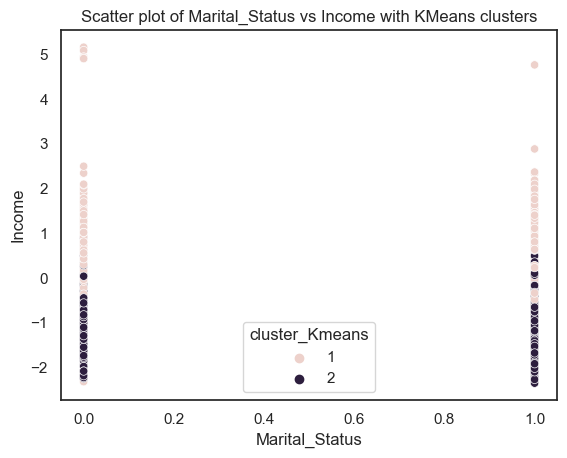

In [101]:
sns.scatterplot(x=dataset_copy['Marital_Status'], y=dataset_copy['Income'], hue=dataset_copy['cluster_Kmeans'])
plt.title('Scatter plot of Marital_Status vs Income with KMeans clusters')
plt.xlabel('Marital_Status')
plt.ylabel('Income')
plt.show()

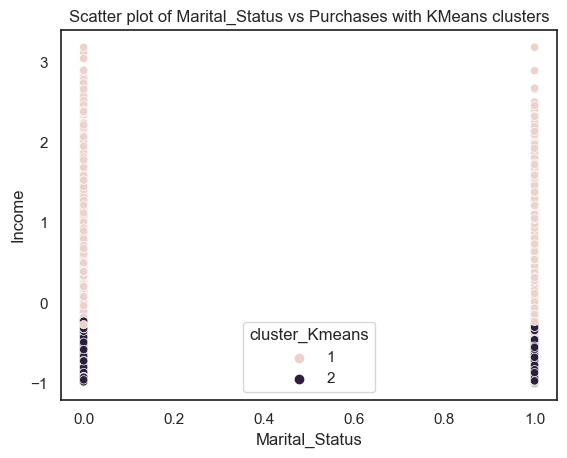

In [102]:
sns.scatterplot(x=dataset_copy['Marital_Status'], y=dataset_copy['Purchases'], hue=dataset_copy['cluster_Kmeans'])
plt.title('Scatter plot of Marital_Status vs Purchases with KMeans clusters')
plt.xlabel('Marital_Status')
plt.ylabel('Income')
plt.show()

## Conclusions

#### Cluster 1:
People with less expenses

people who are married and parents of more than 3 kids

people which low income

#### Cluster 2:
People with more expenses

People who are single or parents who have less than 3 kids

People with high income

Age is not the criteria but it is observed to some extent that people who are older fall in this group

Therefore, customers falling in cluster 2 like to spend more. The Firm's should target people falling in cluster 2